In [1]:
import os
import sys
# 現在のノートブック位置: notebooks/demo
# プロジェクトルートは notebooks/demo/ から 2階層上: "../.."
PROJECT_ROOT = os.path.abspath(os.path.join("..", ".."))

# Python のモジュール検索パスに追加
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# print("PROJECT_ROOT:", PROJECT_ROOT)
# print("sys.path:", sys.path)

In [2]:
# from src.config import RAW_DATA_DIR
from src.dataset.process import load_npz_file, load_npz_signal, target_image, collected_signal

In [3]:
file_y = "Rand+Mnist+Rand_pix28x28_image(1500+10+1500)x2_sig2500_ffts02_DMD200x200_1547.npz"
data_y = load_npz_signal(file_name=file_y)
print("data:", data_y.shape)

data: (6020, 2500)


In [4]:
file_x = "Rand+Mnist+Rand_size28x28_image(1500+10+1500)x2.npz"
data_x = load_npz_file(file_name=file_x)
print("data x:", data_x.shape)

data x: (6020, 784)


In [5]:
random_0_3000 = data_x[:3000, :]
mnist = data_x[3000:3020, :]
random_3020_6020 = data_x[3020:, :]
print(random_0_3000.shape)
print(mnist.shape)
print(random_3020_6020.shape)

(3000, 784)
(20, 784)
(3000, 784)


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

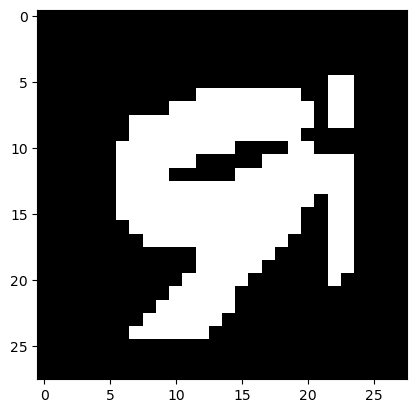

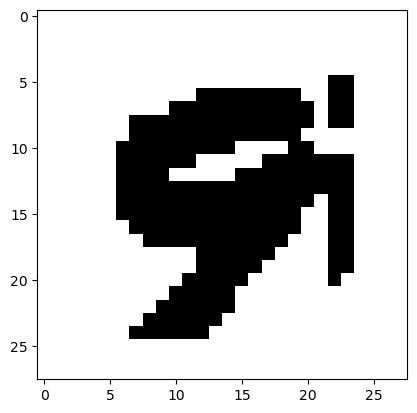

In [7]:
plt.imshow(mnist[18].reshape((28, -1)), cmap="gray")
plt.show()
plt.imshow(mnist[19].reshape((28, -1)), cmap="gray")
plt.show()

In [8]:
mnist_white = mnist[::2, :]
mnist_black = mnist[1::2, :]
random = np.vstack((random_0_3000, random_3020_6020))

In [9]:
print(mnist_white.shape)
print(mnist_black.shape)
print(random.shape)

(10, 784)
(10, 784)
(6000, 784)


In [10]:
random_white = random[::2, :]
random_black = random[1::2, :]
print(random_white.shape)
print(random_black.shape)

(3000, 784)
(3000, 784)


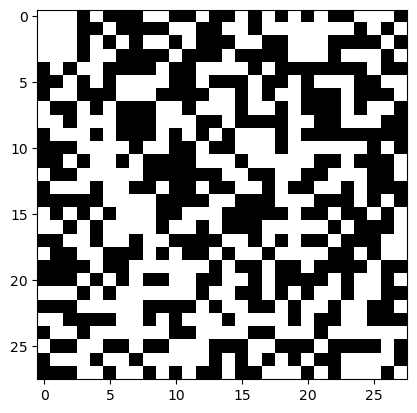

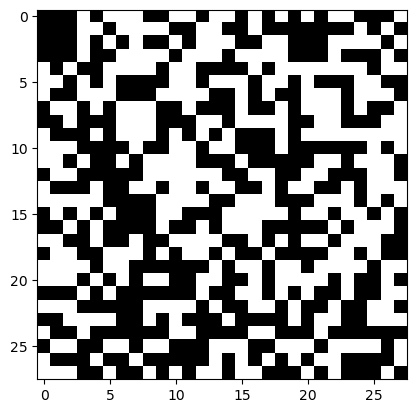

In [11]:
plt.imshow(random_black[2999].reshape((28, -1)), cmap="gray")
plt.show()
plt.imshow(random_white[2999].reshape((28, -1)), cmap="gray")
plt.show()

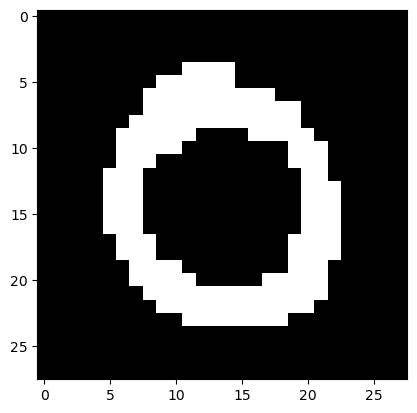

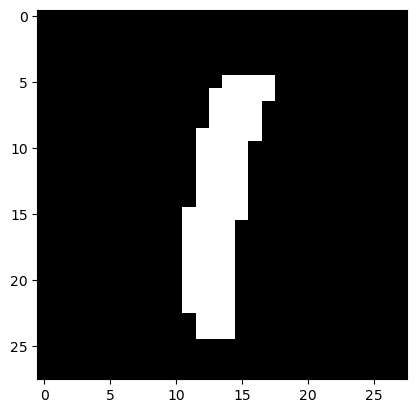

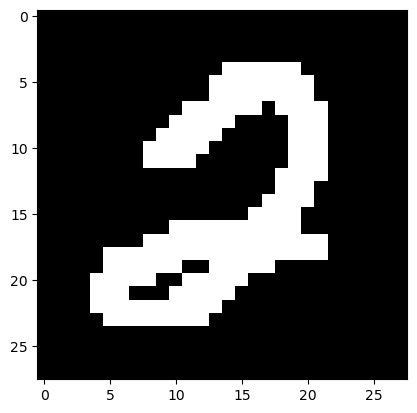

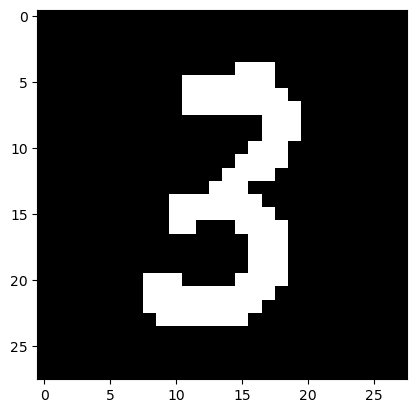

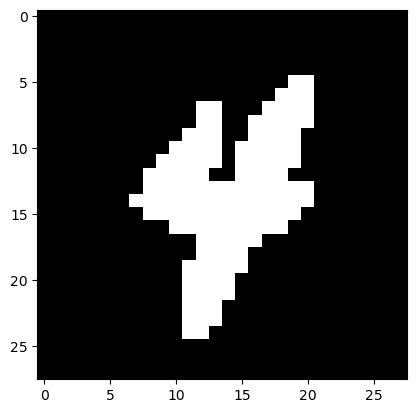

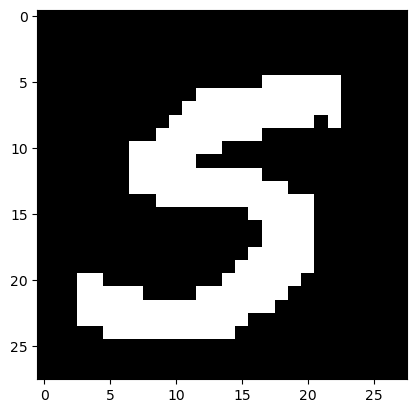

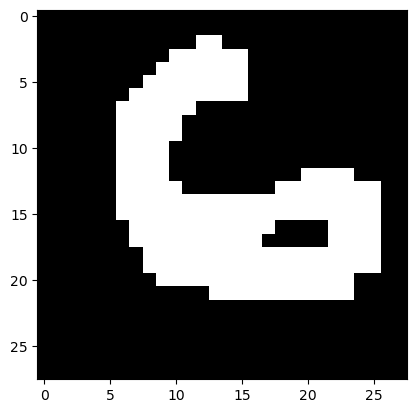

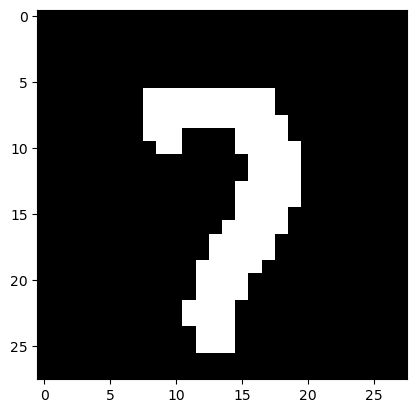

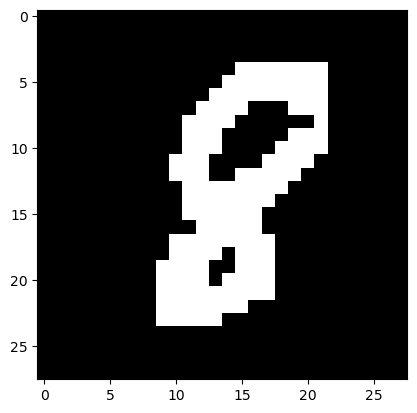

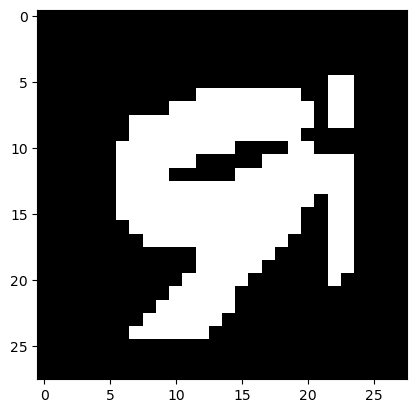

In [12]:
X_random_w, X_mnist_w = target_image(path=file_x, select="white")
for i in range(10):
    plt.imshow(X_mnist_w[i].reshape((28, -1)), cmap="gray")
    plt.show()

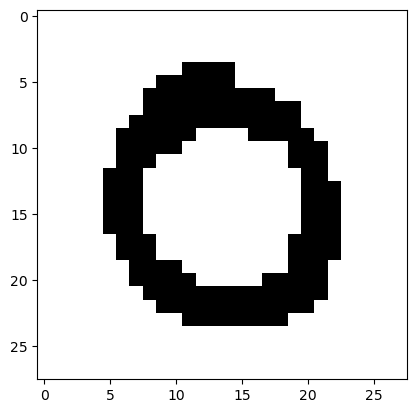

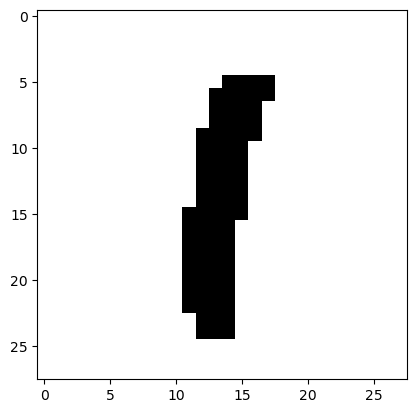

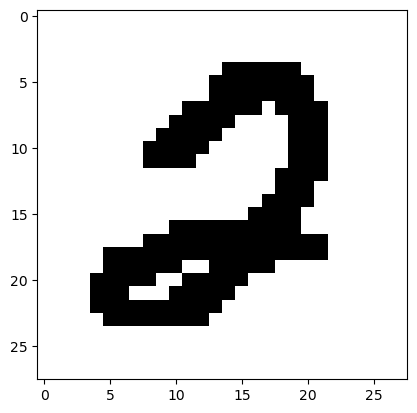

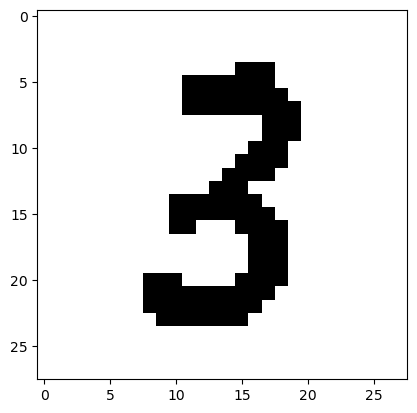

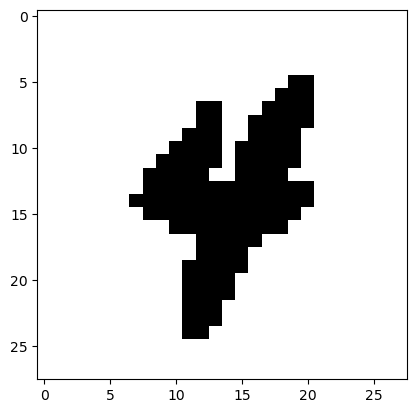

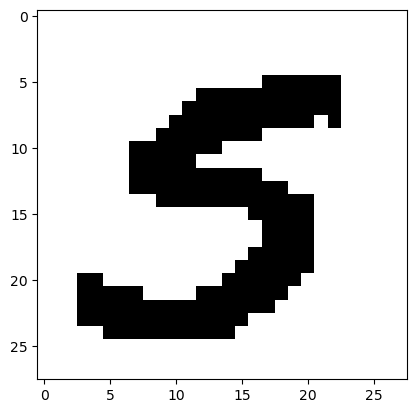

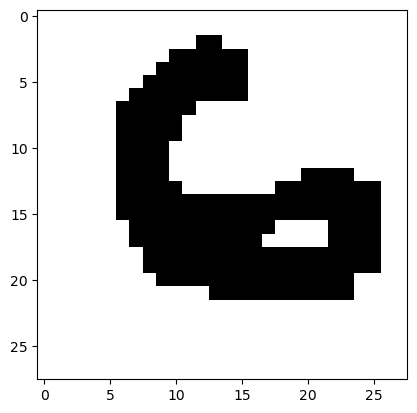

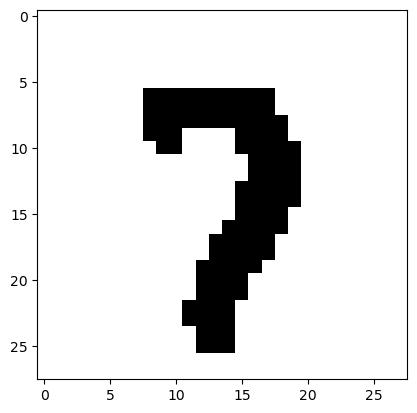

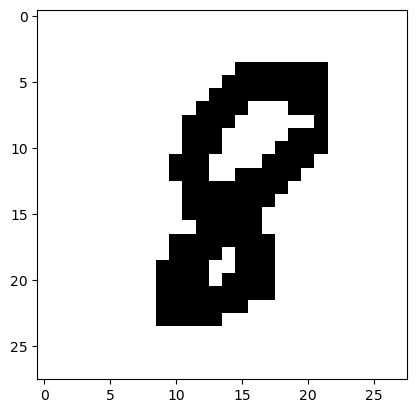

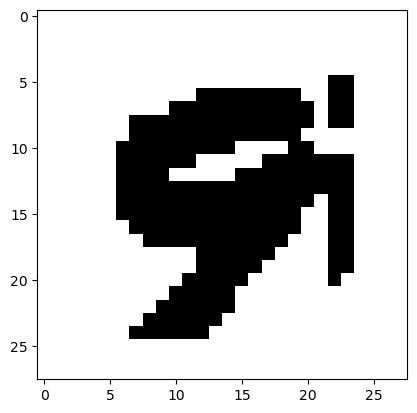

In [13]:
X_random_b, X_mnist_b = target_image(path=file_x, select="black")
for i in range(10):
    plt.imshow(X_mnist_b[i].reshape((28, -1)), cmap="gray")
    plt.show()

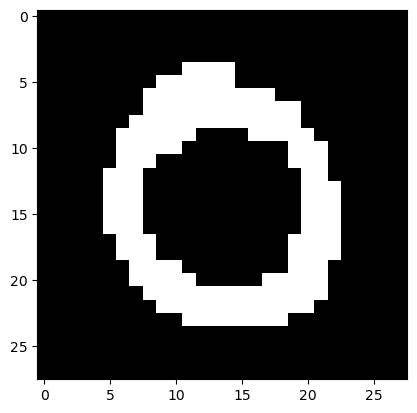

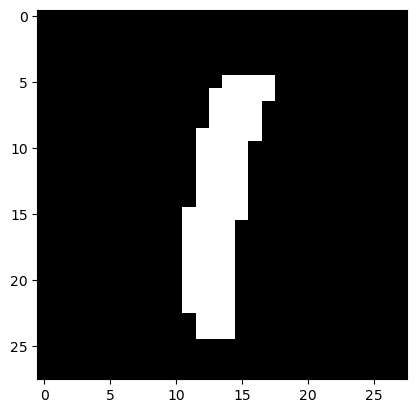

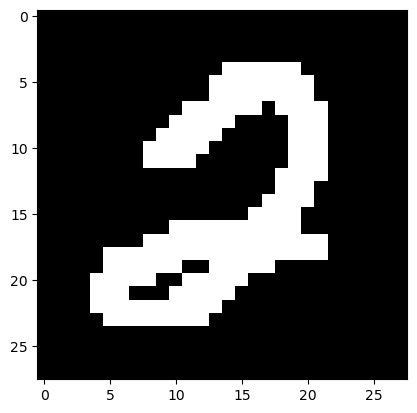

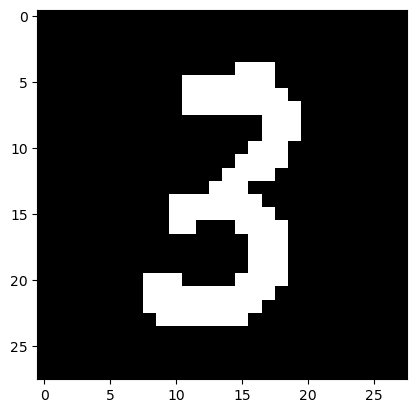

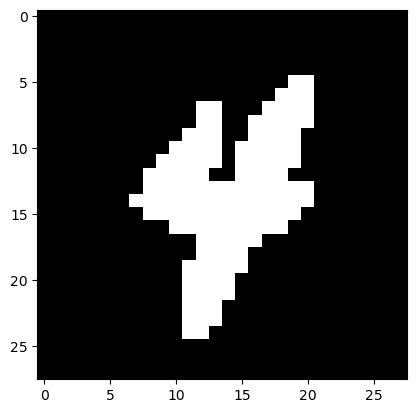

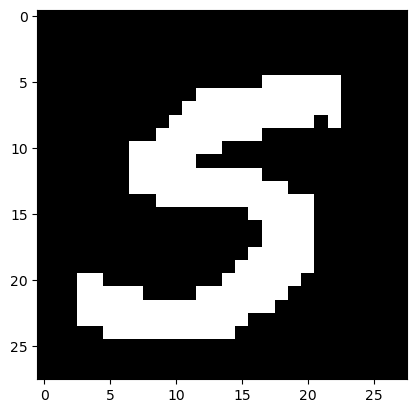

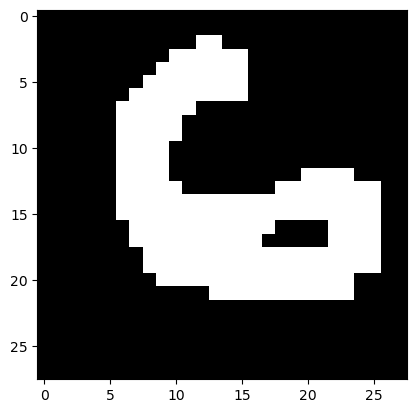

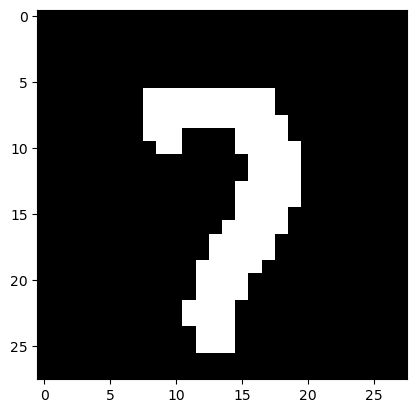

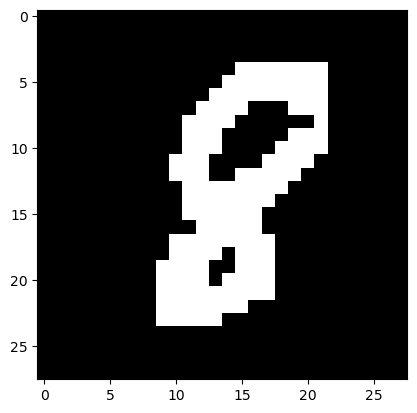

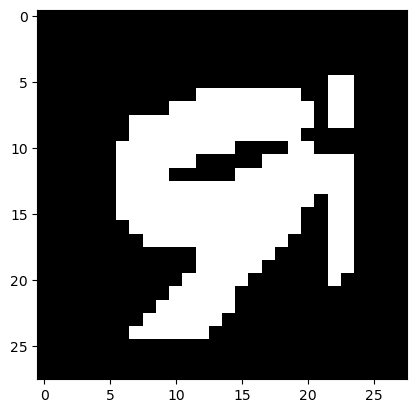

-1.0 1.0


In [14]:
X_random_diff, X_mnist_diff = target_image(path=file_x, select="both")
for i in range(10):
    plt.imshow(X_mnist_diff[i].reshape((28, -1)), cmap="gray", vmin=-1, vmax=1)
    plt.show()
print(X_mnist_diff.min(), X_mnist_diff.max())

In [15]:
Y_random_w, Y_mnist_w = collected_signal(path=file_y, select="white")
print(Y_random_w.shape)
print(Y_mnist_w.shape)

(3000, 2500)
(10, 2500)


In [16]:
Y_random_b, Y_mnist_b = collected_signal(path=file_y, select="black")
print(Y_random_b.shape)
print(Y_mnist_b.shape)

(3000, 2500)
(10, 2500)


In [17]:
Y_random_diff, Y_mnist_diff = collected_signal(path=file_y, select="both")
print(Y_random_diff.shape)
print(Y_mnist_diff.shape)

(3000, 2500)
(10, 2500)


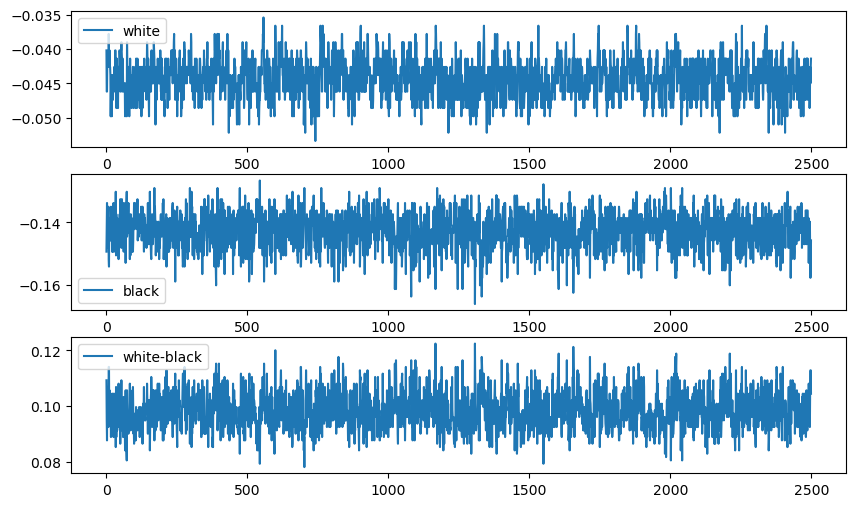

In [18]:
# 例: 試行 i=0 の波形を可視化
i = 5
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(Y_mnist_w[i, :], label='white')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Y_mnist_b[i, :], label='black')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Y_mnist_diff[i, :], label='white-black')
plt.legend()
plt.show()

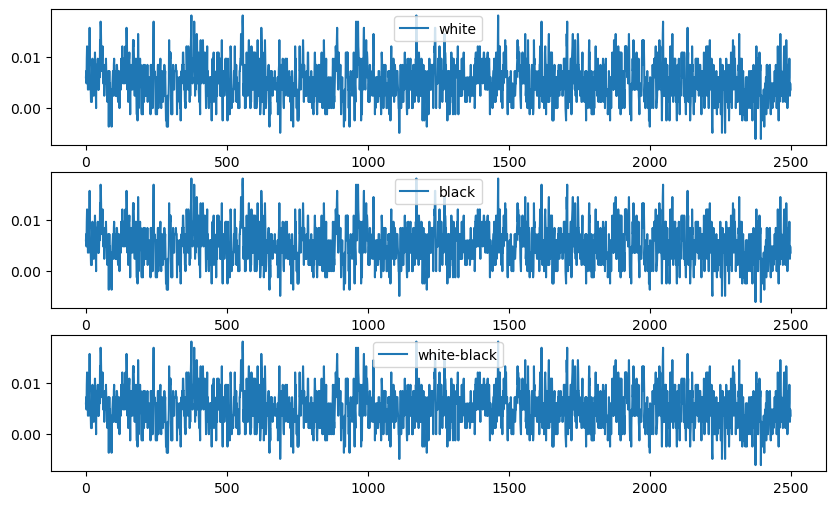

In [19]:
# 例: 試行 i=0 の波形を可視化
i = 1
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(Y_random_w[i, :], label='white')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Y_random_b[i, :], label='black')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Y_random_diff[i, :], label='white-black')
plt.legend()
plt.show()

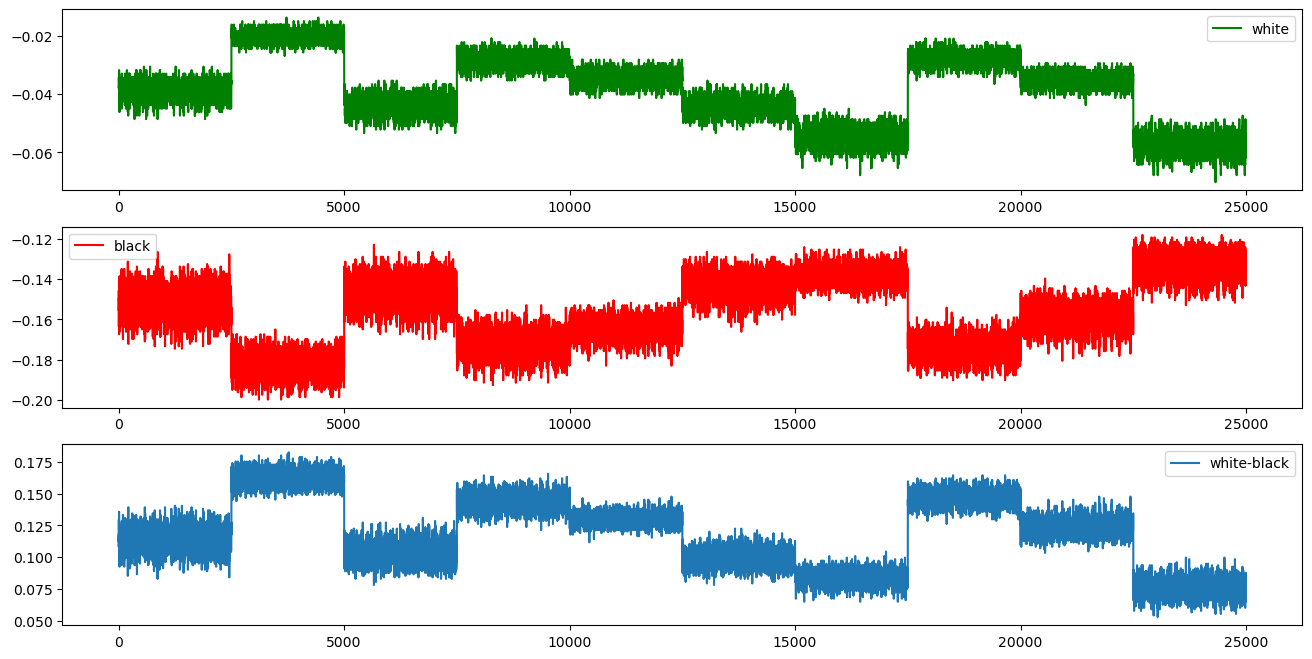

In [20]:
# 例: 試行 i=0 の波形を可視化
i = 1
plt.figure(figsize=(16, 8))
plt.subplot(3,1,1)
plt.plot(Y_mnist_w.flatten(), label='white', color="green")
plt.legend()

plt.subplot(3,1,2)
plt.plot(Y_mnist_b.flatten(), label='black', color="red")
plt.legend()

plt.subplot(3,1,3)
plt.plot(Y_mnist_diff.flatten(), label='white-black')
plt.legend()
plt.show()

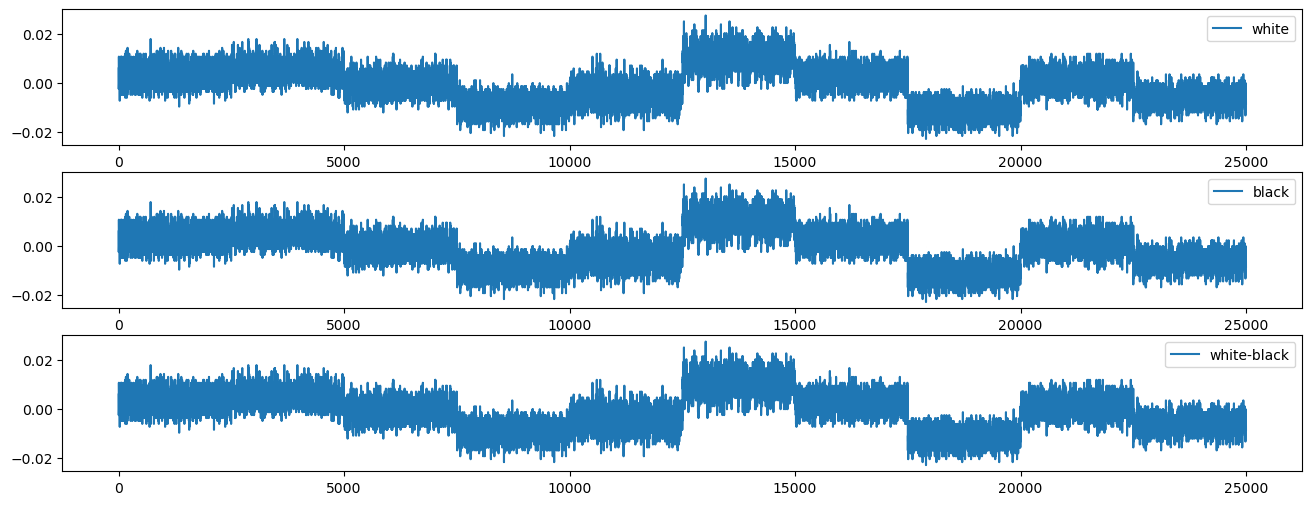

In [21]:
# 例: 試行 i=0 の波形を可視化
i = 1
plt.figure(figsize=(16, 6))
plt.subplot(3,1,1)
plt.plot(Y_random_w[:10, :].flatten(), label='white')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Y_random_b[:10, :].flatten(), label='black')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Y_random_diff[:10, :].flatten(), label='white-black')
plt.legend()
plt.show()

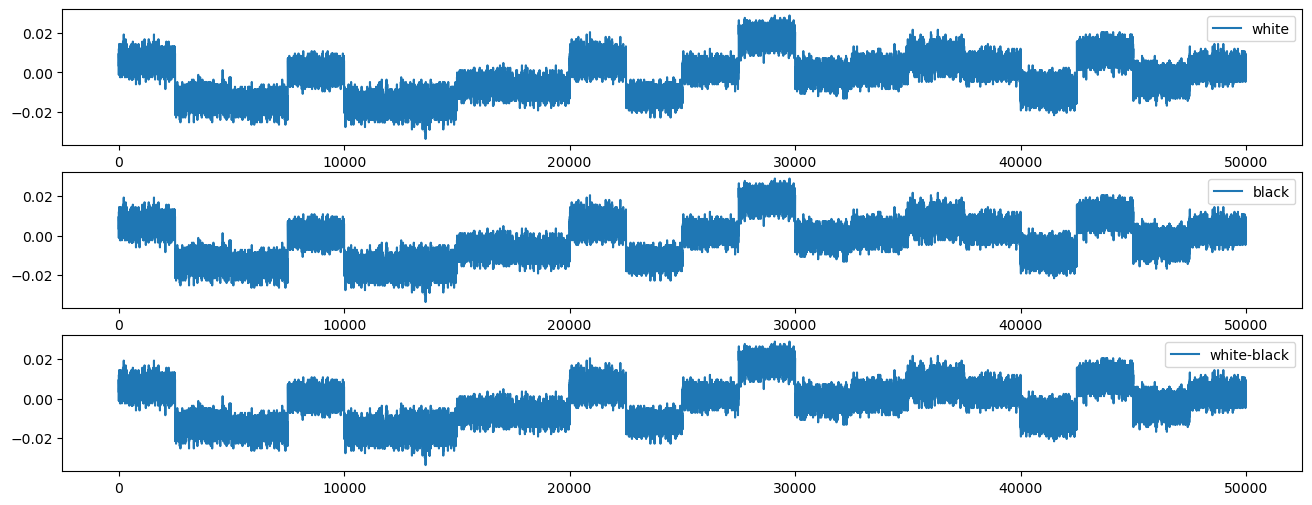

In [22]:
# 例: 試行 i=0 の波形を可視化
i = 1
plt.figure(figsize=(16, 6))
plt.subplot(3,1,1)
plt.plot(Y_random_w[10:30, :].flatten(), label='white')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Y_random_b[10:30, :].flatten(), label='black')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Y_random_diff[10:30, :].flatten(), label='white-black')
plt.legend()
plt.show()

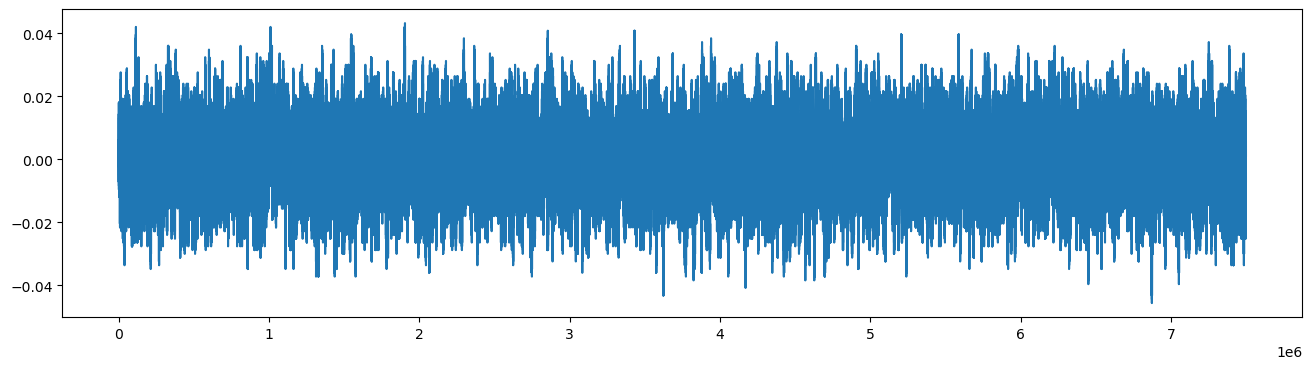

In [23]:
plt.figure(figsize=(16,4))
plt.plot(Y_random_diff.flatten(), label='white-black')
plt.show()

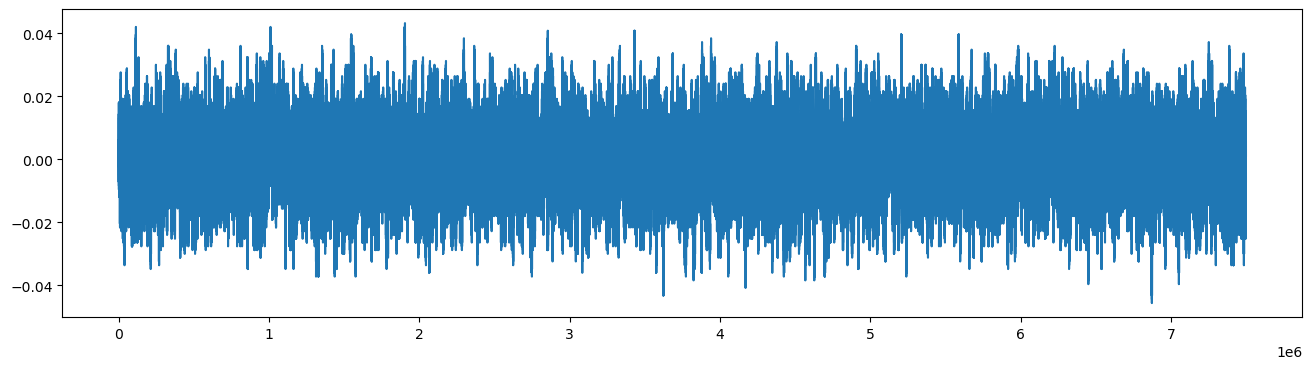

In [24]:
plt.figure(figsize=(16,4))
plt.plot(Y_random_w.flatten(), label='white-black')
plt.show()

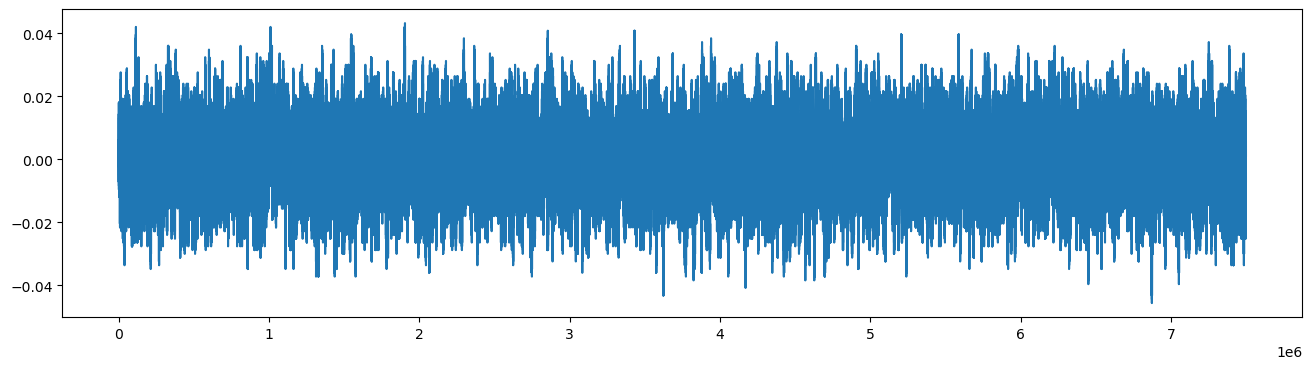

In [25]:
plt.figure(figsize=(16,4))
plt.plot(Y_random_b.flatten(), label='white-black')
plt.show()

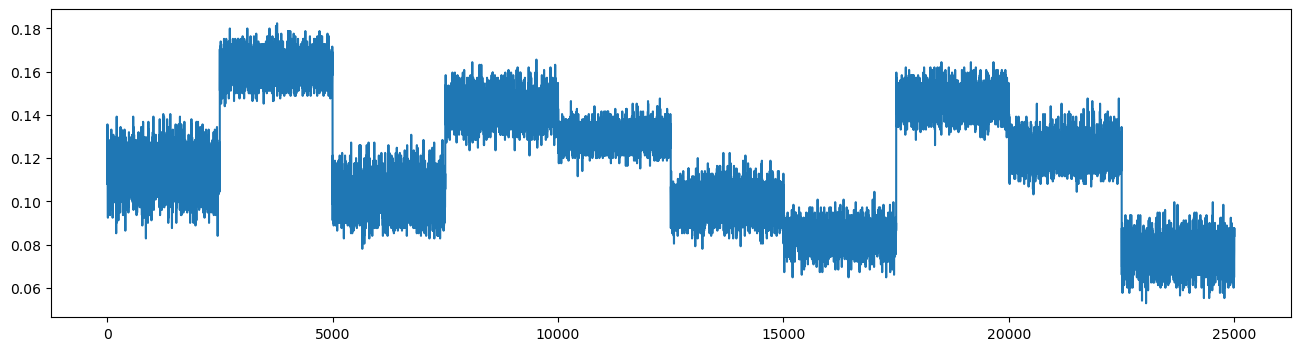

In [26]:
plt.figure(figsize=(16,4))
plt.plot(Y_mnist_diff.flatten(), label='white-black')
plt.show()